### Clustering cities based on similarity

### Task1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
#importing all datasets
world_city=pd.read_csv("DS2_C6_S2_WorldCities_Data_Practice.csv")
city=pd.read_csv("DS2_C6_S2_Cities_Data_Practice.csv")
cost=pd.read_csv("DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv")
quality=pd.read_csv("DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv")

In [3]:
world_city.tail()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
26568,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


In [4]:
world_city.shape

(26569, 11)

In [5]:
#renaming for easy merging
world_city.rename(columns={"city":"City"},inplace=True)

In [6]:
world_city.sort_values("population",ascending=False,inplace=True)

In [7]:
world_city.tail()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
9472,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172
9473,Tarrafal,Tarrafal,15.2833,-23.7667,Cabo Verde,CV,CPV,Tarrafal,admin,NaN,1132834308


In [8]:
#dropping duplicates keeping only first by city
world_city.drop_duplicates(subset=["City"],keep="first",inplace=True)

In [9]:
world_city.columns

Index(['City', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [10]:
city.columns

Index(['City', 'Country'], dtype='object')

In [11]:
#merging all datasets wrt common column City

In [12]:
m1=world_city.merge(right=city,on="City")

In [13]:
cost.columns

Index(['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income'],
      dtype='object')

In [14]:
m2=m1.merge(cost,on="City")

In [15]:
quality.columns

Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')

In [16]:
df=m2.merge(quality,on="City")

In [17]:
df.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,...,8.52,0.98,1967.31,2065.67,80.00,47.57,71.53,30.54,69.29,13.91
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,...,16.83,0.45,807.70,336.54,69.15,17.38,38.33,57.91,15.66,48.27
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,...,7.24,0.84,362.03,362.03,77.12,34.39,74.99,73.03,42.45,52.56
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,...,6.03,0.89,603.39,337.90,77.13,28.83,58.41,70.49,26.43,34.63
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,...,4.75,0.86,791.68,221.67,68.31,14.80,80.56,65.22,13.14,66.36


In [18]:
df.columns

Index(['City', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id', 'Country', 'Cappuccino',
       'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 'Avg Disposable Income',
       'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')

In [19]:
#dropping unnecessary columns for clustering
df.drop(["city_ascii","iso2","iso3","admin_name","id","Country","capital"],axis=1,inplace=True)

In [20]:
df.head()

,City,lat,lng,country,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Tokyo,35.6897,139.6922,Japan,37977000.0,2.30,11.80,8.52,0.98,1967.31,2065.67,80.00,47.57,71.53,30.54,69.29,13.91
1,Jakarta,-6.2146,106.8451,Indonesia,34540000.0,1.88,3.37,16.83,0.45,807.70,336.54,69.15,17.38,38.33,57.91,15.66,48.27
2,Delhi,28.6600,77.2300,India,29617000.0,0.84,2.41,7.24,0.84,362.03,362.03,77.12,34.39,74.99,73.03,42.45,52.56
3,Mumbai,18.9667,72.8333,India,23355000.0,0.84,3.02,6.03,0.89,603.39,337.90,77.13,28.83,58.41,70.49,26.43,34.63
4,Manila,14.5958,120.9772,Philippines,23088000.0,1.58,2.77,4.75,0.86,791.68,221.67,68.31,14.80,80.56,65.22,13.14,66.36


In [21]:
df.shape

(189, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   189 non-null    object 
 1   lat                    189 non-null    float64
 2   lng                    189 non-null    float64
 3   country                189 non-null    object 
 4   population             189 non-null    float64
 5   Cappuccino             189 non-null    float64
 6   Cinema                 189 non-null    float64
 7   Wine                   189 non-null    float64
 8   Gasoline               189 non-null    float64
 9   Avg Rent               189 non-null    float64
 10  Avg Disposable Income  189 non-null    float64
 11  Movehub Rating         189 non-null    float64
 12  Purchase Power         189 non-null    float64
 13  Health Care            189 non-null    float64
 14  Pollution              189 non-null    float64
 15  Qualit

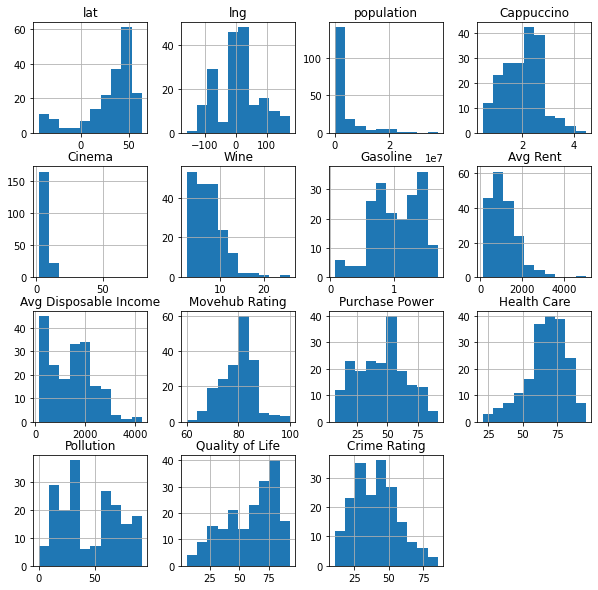

In [23]:
#checking distribution of numerical columns
df.hist(figsize=(10,10))
plt.show()

In [24]:
#c=df.select_dtypes(include="object").columns.to_list()

In [25]:
# for i in c:
#     df[i]=df[i].astype("category")
# for i in c:
#     df[i]=LabelEncoder().fit_transform(df[i])

In [26]:
df.head()
main=df.copy()

In [27]:
df1=df.iloc[:,4:]

In [28]:
#scaling dataset using min max scaler
scaler=MinMaxScaler()

In [29]:
df_s=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df2=df_s.copy()
df3=df_s.copy()

In [30]:
df_s.head()

,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,1.000000,0.457711,0.128605,0.266028,0.565217,0.374446,0.469189,0.501496,0.481923,0.674830,0.330448,0.729262,0.040754
1,0.909478,0.353234,0.020082,0.611990,0.236025,0.139309,0.052072,0.231057,0.128700,0.232930,0.626596,0.118163,0.499866
2,0.779818,0.094527,0.007724,0.212739,0.478261,0.048939,0.058221,0.429711,0.327717,0.720884,0.790197,0.423428,0.557189
3,0.614893,0.094527,0.015577,0.162365,0.509317,0.097880,0.052400,0.429960,0.262665,0.500200,0.762714,0.240884,0.317611
4,0.607861,0.278607,0.012358,0.109076,0.490683,0.136060,0.024362,0.210120,0.098514,0.795022,0.705691,0.089448,0.741582


### Task2

In [31]:
#finding optimum value of k using elbow curve

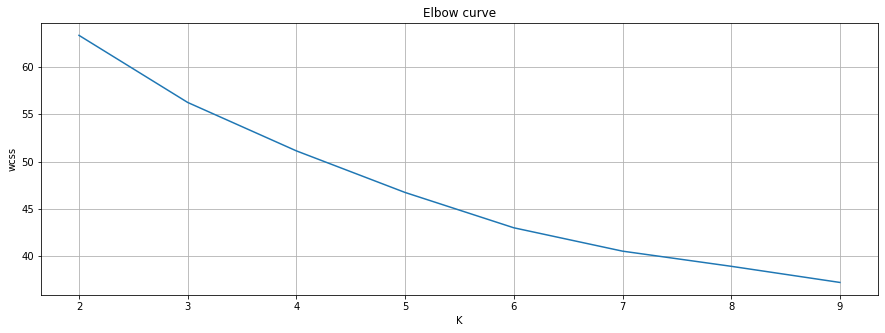

In [32]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=2)
    kmeans.fit(df_s)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), wcss)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('Elbow curve');

In [33]:
#here optimum k is seen as 6. 

In [34]:
#metrics for quality of cluster model:Silhouette Score

In [35]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7]
for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i,random_state=2)
    cluster_labels = clusterer.fit_predict(df_s)
    silhouette_avg = silhouette_score(df_s, cluster_labels)
    print("For n_clusters =", i,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.30314018233825296
For n_clusters = 3 The average silhouette_score is : 0.22202537675252176
For n_clusters = 4 The average silhouette_score is : 0.1766154420575992
For n_clusters = 5 The average silhouette_score is : 0.1742012933015521
For n_clusters = 6 The average silhouette_score is : 0.19064346428457446
For n_clusters = 7 The average silhouette_score is : 0.17324952854358078


In [36]:
#choosing k as 6 as seen from both metrics it was optimal

### Task3

In [37]:
#building model with n_clusters=6
model=KMeans(n_clusters=6).fit(df_s)

In [38]:
#predicted labels for our features
labels=model.labels_
labels

array([3, 4, 4, 4, 4, 4, 0, 1, 4, 4, 3, 1, 4, 4, 1, 1, 1, 5, 4, 0, 5, 1,
       0, 0, 0, 1, 3, 1, 1, 5, 3, 5, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0,
       5, 5, 1, 5, 1, 3, 2, 0, 2, 5, 0, 0, 1, 2, 5, 1, 3, 3, 1, 1, 3, 3,
       5, 1, 0, 0, 5, 3, 5, 1, 1, 2, 5, 1, 0, 2, 0, 5, 5, 3, 0, 0, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 5, 1, 2, 3, 5, 1, 0, 3, 2, 0, 2, 3, 3, 2,
       3, 0, 2, 3, 3, 3, 2, 1, 2, 5, 2, 2, 3, 5, 2, 1, 1, 5, 2, 0, 0, 3,
       3, 5, 1, 1, 2, 2, 2, 0, 5, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 5, 2, 2,
       5, 0, 2, 2, 2, 5, 0, 2, 2, 3, 2, 5, 2, 1, 0, 2, 2, 3, 1, 2, 3, 2,
       0, 3, 2, 0, 3, 2, 1, 0, 0, 0, 3, 0, 1])

In [39]:
#cluster centres 
model.cluster_centers_

array([[0.08861645, 0.46105188, 0.0741945 , 0.21345307, 0.55084295,
        0.24389201, 0.49167769, 0.61615867, 0.67770479, 0.68976821,
        0.75735617, 0.77443026, 0.42275712],
       [0.12769496, 0.28392758, 0.03446118, 0.20190351, 0.49120083,
        0.1252469 , 0.09481492, 0.32306553, 0.2028002 , 0.42565109,
        0.45007995, 0.29085954, 0.62861883],
       [0.0231763 , 0.40008292, 0.07435151, 0.13206009, 0.78636128,
        0.19230022, 0.35375075, 0.55028664, 0.53320853, 0.67380707,
        0.29049223, 0.75324275, 0.31679806],
       [0.10093304, 0.56182324, 0.1210017 , 0.37019396, 0.516076  ,
        0.36221427, 0.54777486, 0.62371708, 0.62818739, 0.68054196,
        0.22926028, 0.81910893, 0.30418619],
       [0.5749416 , 0.32263682, 0.03329042, 0.34750208, 0.39813665,
        0.15440412, 0.07026074, 0.33482054, 0.18884989, 0.60851857,
        0.72170526, 0.24046263, 0.47550775],
       [0.07930297, 0.17231152, 0.02809851, 0.0941363 , 0.60750119,
        0.08416651, 0.10138

In [40]:
#importing required libraries for geo visualization
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [41]:
#labels=model.fit_predict(df_s)
df_s["cluster"]=labels

In [42]:
df_s["lat"]=df["lat"]
df_s["lng"]=df["lng"]
df=df.iloc[:,1:]
cities_all=df_s.copy()

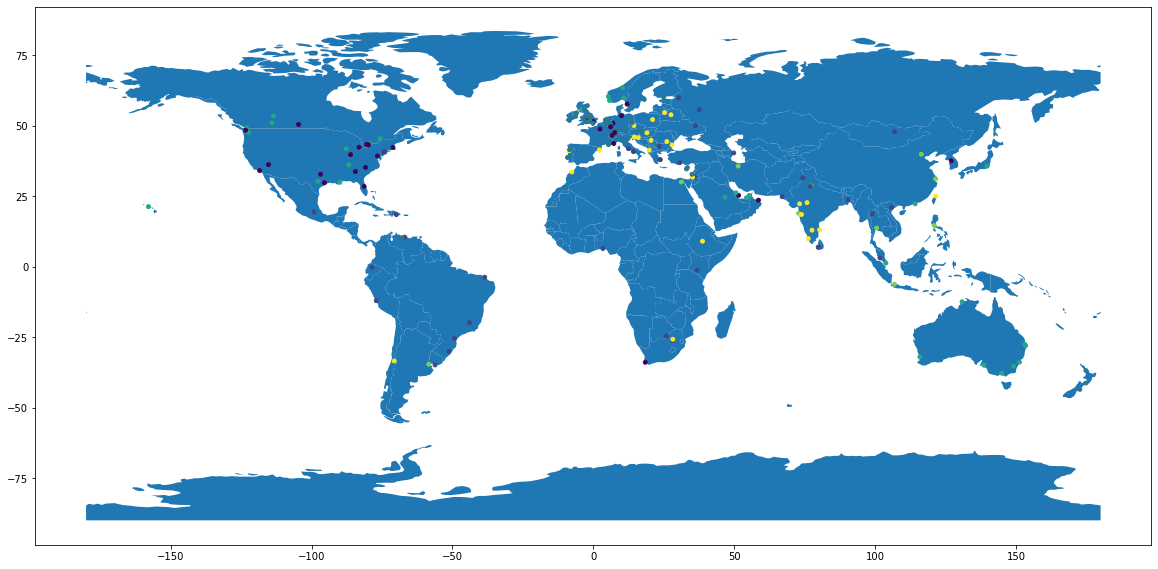

In [43]:
#visualization of how cities are clustered 
geometry = [Point(xy) for xy in zip(cities_all['lng'], cities_all['lat'])]
gdf = GeoDataFrame(df_s, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', c=cities_all.cluster.astype(float), markersize=15);

In [44]:
#distribution of cities in cluster when k=2

In [45]:
m2=KMeans(n_clusters=2).fit(df2)
labels2=m2.labels_
df2["cluster"]=labels2

<AxesSubplot:>

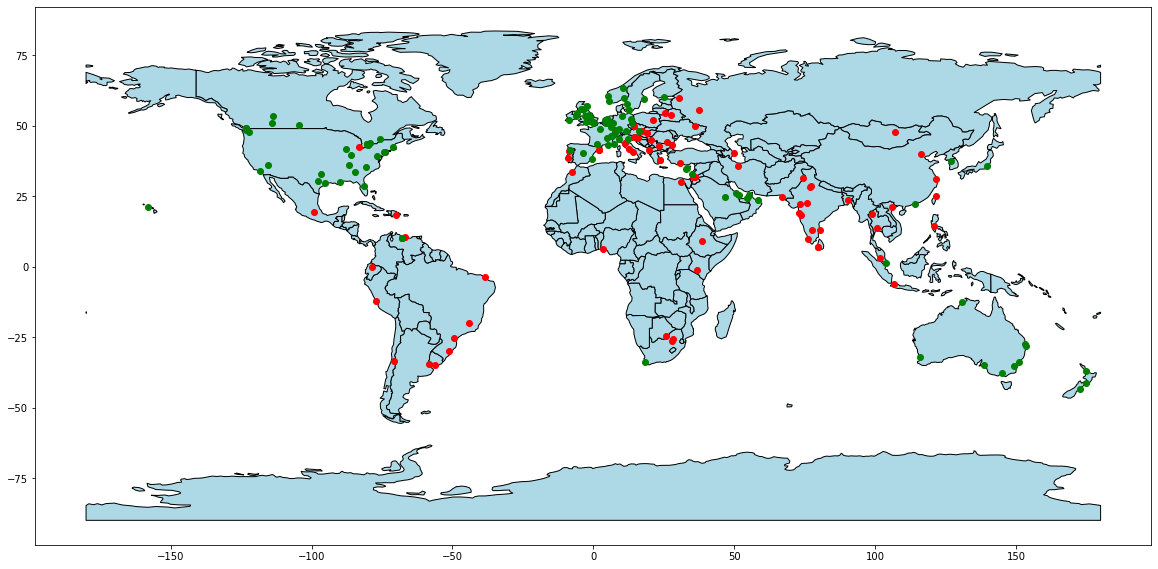

In [46]:
a = df[df2["cluster"]==0]
gdf1 = gpd.GeoDataFrame(a, geometry=gpd.points_from_xy(a.lng, a.lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(color = 'lightblue' , edgecolor = 'k', figsize=(20, 10))
gdf1.plot(ax = axis, color='red')

b = df[df2["cluster"]==1]
gdf2 = gpd.GeoDataFrame(b, geometry=gpd.points_from_xy(b.lng, b.lat))
gdf2.plot(ax = axis, color='green')



In [47]:
#k=4 clustering visualization

In [48]:
m3=KMeans(n_clusters=4).fit(df3)
labels3=m3.labels_
df3["cluster"]=labels3

<AxesSubplot:>

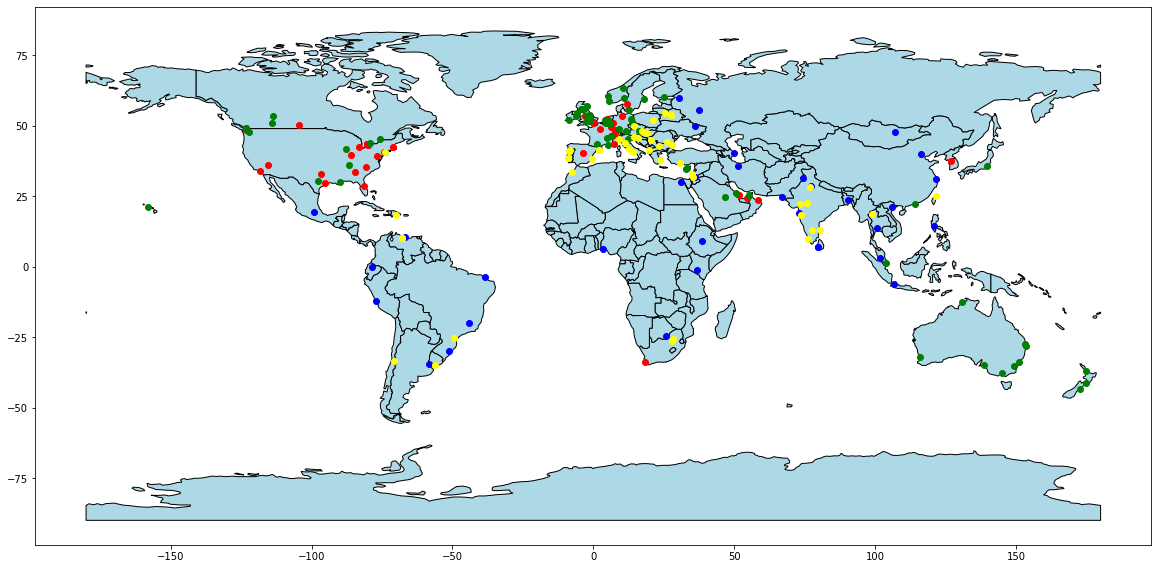

In [49]:
a = df[df3["cluster"]==0]
gdf1 = gpd.GeoDataFrame(a, geometry=gpd.points_from_xy(a.lng, a.lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(color = 'lightblue' , edgecolor = 'k', figsize=(20, 10))
gdf1.plot(ax = axis, color='red')

b = df[df3["cluster"]==1]
gdf2 = gpd.GeoDataFrame(b, geometry=gpd.points_from_xy(b.lng, b.lat))
gdf2.plot(ax = axis, color='green')

c = df[df3["cluster"]==2]
gdf2 = gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(c.lng, c.lat))
gdf2.plot(ax = axis, color='blue')

d = df[df3["cluster"]==3]
gdf2 = gpd.GeoDataFrame(d, geometry=gpd.points_from_xy(d.lng, d.lat))
gdf2.plot(ax = axis, color='yellow')

In [50]:
city_cluster=pd.concat([main["City"],df_s["cluster"]],axis=1)

In [51]:
#city vs which cluster they have been put into by k means algo
city_cluster

,City,cluster
0,Tokyo,3
1,Jakarta,4
2,Delhi,4
3,Mumbai,4
4,Manila,4
...,...,...
184,Cambridge,0
185,Cambridge,0
186,Stavanger,3
187,Luxembourg,0


In [52]:
city_cluster.groupby("cluster").count()

,City
cluster,
0,35
1,36
2,48
3,34
4,10
5,26


In [53]:
#our K means model has classified many cities into cluster 1 